DBSCAN - алгоритм кластеризации, кластеризует по наличию определённого количества объектов в окрестности заданного расстояния. Если нужное количество объектов есть - то это кластер, остальные его точки на первом этапе краевые. Если же нужного количества нет, то точка считается шумом.

Датасет для распределения пингвинов по их видам
https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data

Датасет включает: длину клюва, глубину клюва, длину крыльев/плавников, массу тела и пол

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Обработка данных

In [2]:
data = pd.read_csv('./penguins.csv')

In [3]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.nunique()

culmen_length_mm     163
culmen_depth_mm       80
flipper_length_mm     56
body_mass_g           93
sex                    3
dtype: int64

In [7]:
for col in data:
    print(col + ': ' + str(sorted(data[col].unique())))

culmen_length_mm: [32.1, 33.1, 33.5, 34.0, 34.4, 34.5, 34.6, 35.0, 35.1, 35.2, 35.3, 35.5, 35.6, 35.7, 35.9, 36.0, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.2, 37.3, 37.5, 37.6, 37.7, 37.8, 37.9, 38.1, 38.2, 38.3, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.5, 39.6, 39.7, 39.8, 40.1, 40.2, 40.3, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.8, 44.0, 44.1, 44.4, 44.5, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 48.1, 48.2, 48.4, 48.5, 48.6, 48.7, 48.8, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.3, 51.4, 51.5, 51.7, 51.9, 52.0, 52.1, 52.2, 52.5, 52.7, 52.8, 53.4, 53.5, 54.2, 54.3, 55.1, 55.8, 55.9, 58.0, 59.6]
cul

In [8]:
for col in data:
    print(col + ': ' + str(sorted(data[col].value_counts())))

culmen_length_mm: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 7]
culmen_depth_mm: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10, 12]
flipper_length_mm: [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 10, 10, 12, 13, 14, 14, 16, 17, 21]
body_mass_g: [1, 1, 1, 1, 1, 1, 

In [9]:
data = data[data.sex != '.']

In [10]:
for col in data:
    print(col + ': ' + str(sorted(data[col].unique())))

culmen_length_mm: [32.1, 33.1, 33.5, 34.0, 34.4, 34.5, 34.6, 35.0, 35.1, 35.2, 35.3, 35.5, 35.6, 35.7, 35.9, 36.0, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.2, 37.3, 37.5, 37.6, 37.7, 37.8, 37.9, 38.1, 38.2, 38.3, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.5, 39.6, 39.7, 39.8, 40.1, 40.2, 40.3, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.8, 44.0, 44.1, 44.4, 44.5, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 48.1, 48.2, 48.4, 48.5, 48.6, 48.7, 48.8, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.3, 51.4, 51.5, 51.7, 51.9, 52.0, 52.1, 52.2, 52.5, 52.7, 52.8, 53.4, 53.5, 54.2, 54.3, 55.1, 55.8, 55.9, 58.0, 59.6]
cul

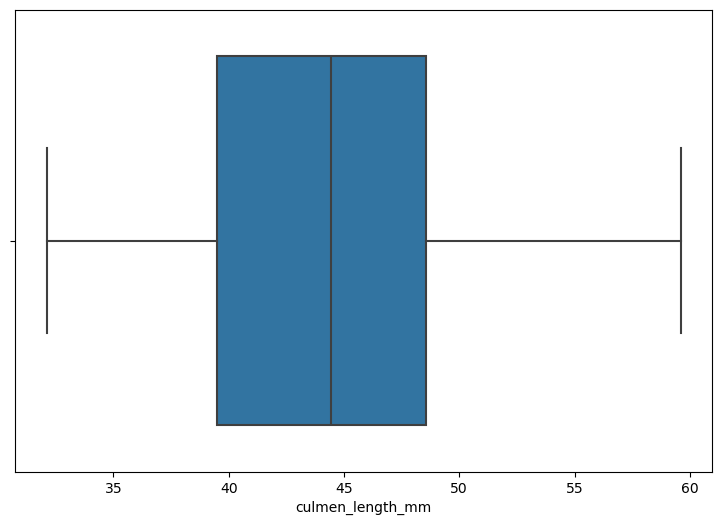

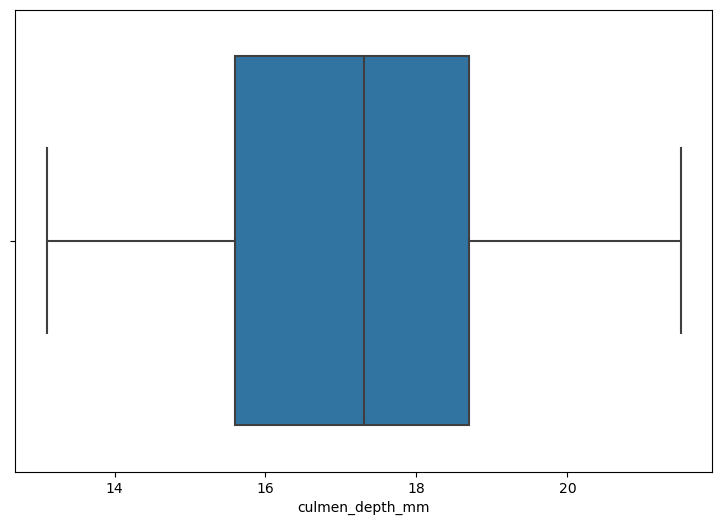

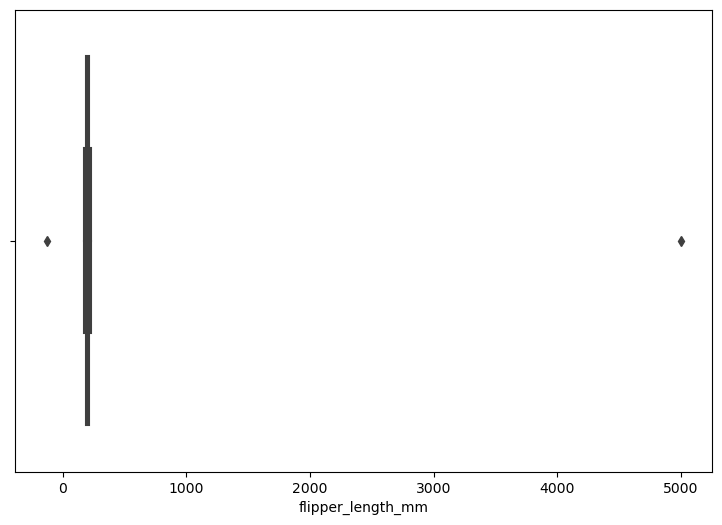

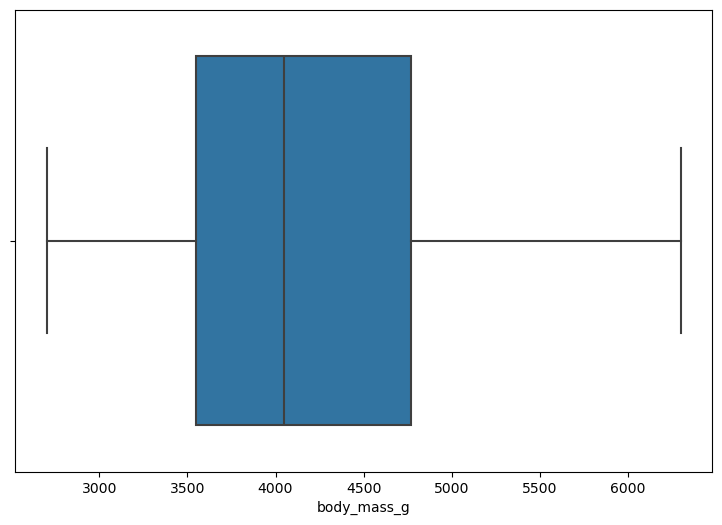

In [11]:
numerical_col = data.describe().columns.tolist()

for col in numerical_col:
  fig = plt.figure(figsize=(9,6))
  # ax = fig.gca()
  sns.boxplot(x=data[col])

In [12]:
le = LabelEncoder()
data.sex = le.fit_transform(data.sex).astype(int)
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,0


<Axes: >

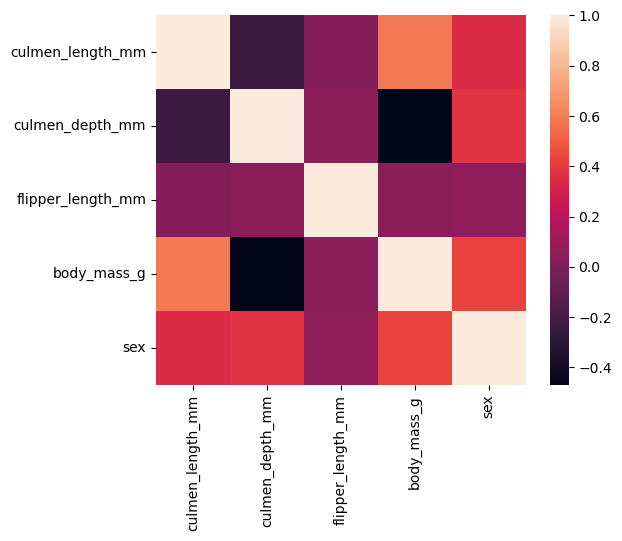

In [13]:
f, ax = plt.subplots()
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax)

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
new_data = pd.DataFrame(data=X, columns=data.columns)
new_data.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.896113,0.774517,-0.126674,-0.569485,0.988095
1,-0.822764,0.114726,-0.107681,-0.507204,-1.012049
2,-0.676065,0.419245,-0.073493,-1.192302,-1.012049
3,-1.336209,1.079036,-0.081090,-0.943175,-1.012049
4,-0.859439,1.738827,-0.092486,-0.694049,0.988095
5,-0.932788,0.317739,-0.126674,-0.725190,-1.012049
6,-0.877776,1.231296,-0.073493,0.582725,0.988095
7,-0.364331,1.535814,18.178878,0.053331,0.988095
8,-0.529367,0.216233,-0.122875,-1.254583,-1.012049
9,-0.987800,2.043346,-0.088688,-0.507204,0.988095


Обучение

In [15]:
from sklearn.cluster import DBSCAN

X = new_data.iloc[:,:].values
dbscan05 = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan05.fit_predict(X)

labels05 = dbscan05.labels_

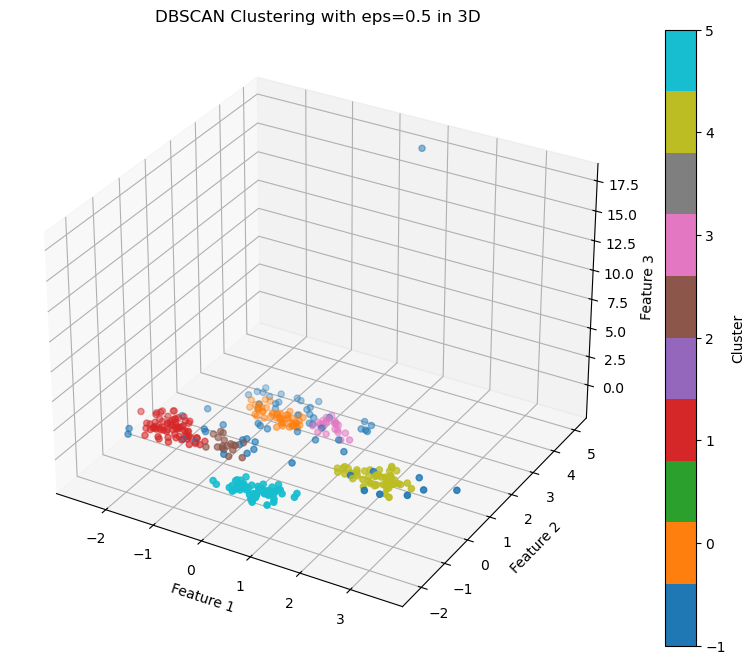

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels05, cmap='tab10')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering with eps=0.5 in 3D')
plt.colorbar(p, label='Cluster')

plt.show()

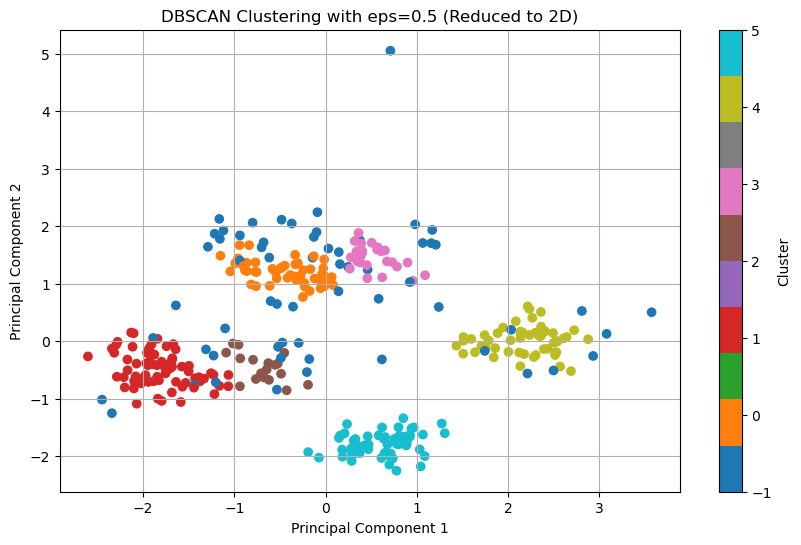

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels05, cmap='tab10')
labels05 = [x for x in labels05 if x != -1]
plt.title('DBSCAN Clustering with eps=0.5 (Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [18]:
dbscan1 = DBSCAN(eps=1.06, min_samples=10)
clusters = dbscan1.fit_predict(X)

labels1 = dbscan1.labels_

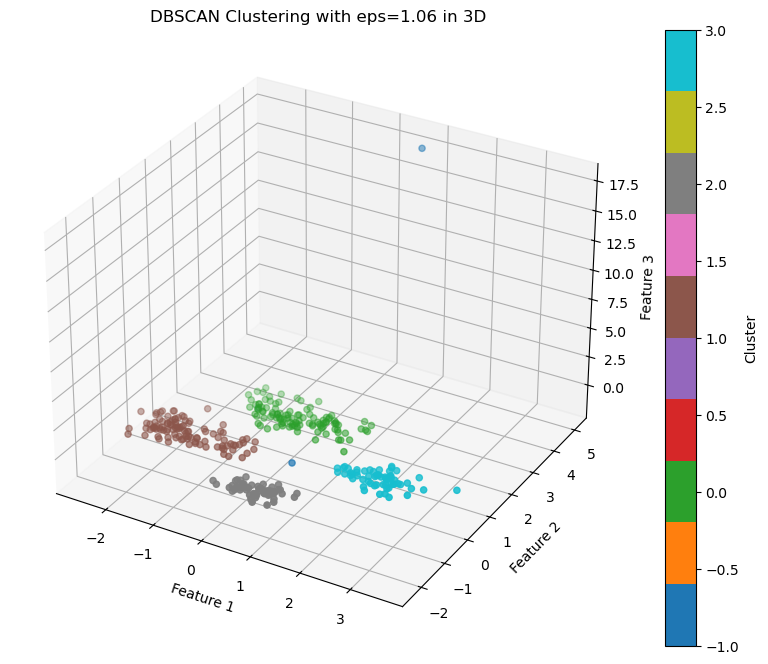

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels1, cmap='tab10')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering with eps=1.06 in 3D')
plt.colorbar(p, label='Cluster')

plt.show()

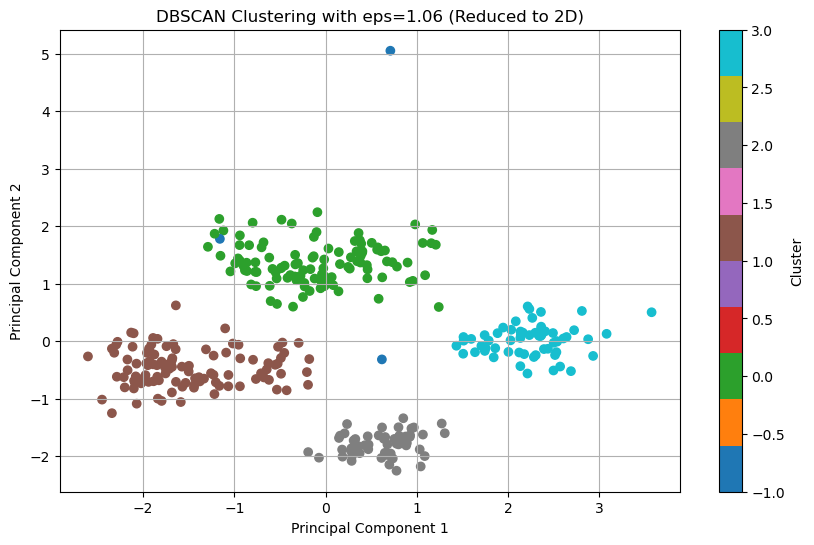

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1, cmap='tab10')
labels1 = [x for x in labels1 if x != -1]
plt.title('DBSCAN Clustering with eps=1.06 (Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [21]:
dbscan2 = DBSCAN(eps=1.07, min_samples=10)
clusters = dbscan2.fit_predict(X)

labels2 = dbscan2.labels_

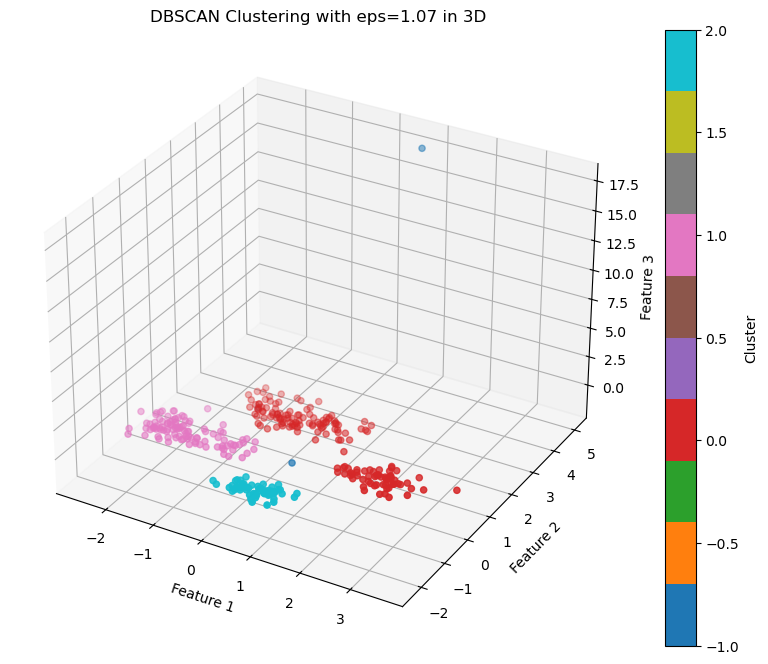

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels2, cmap='tab10')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering with eps=1.07 in 3D')
plt.colorbar(p, label='Cluster')

plt.show()

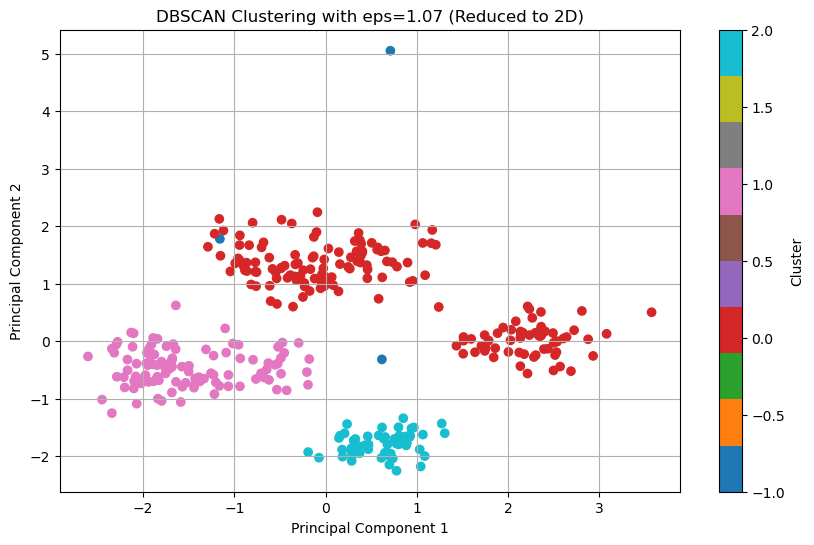

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap='tab10')
labels2 = [x for x in labels2 if x != -1]
plt.title('DBSCAN Clustering with eps=1.07 (Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [24]:
dbscan15 = DBSCAN(eps=1.5, min_samples=10)
clusters = dbscan15.fit_predict(X)

labels15 = dbscan15.labels_

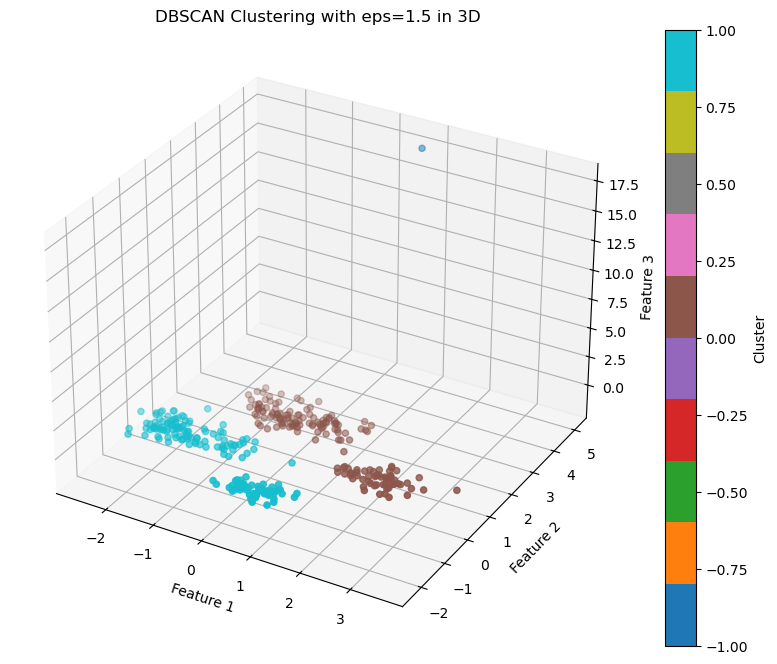

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels15, cmap='tab10')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering with eps=1.5 in 3D')
plt.colorbar(p, label='Cluster')

plt.show()

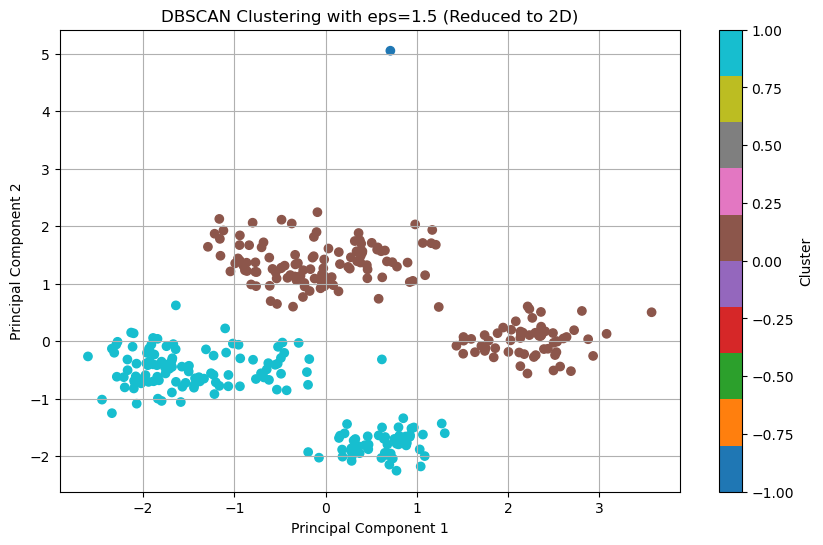

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels15, cmap='tab10')
labels2 = [x for x in labels15 if x != -1]
plt.title('DBSCAN Clustering with eps=1.5 (Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

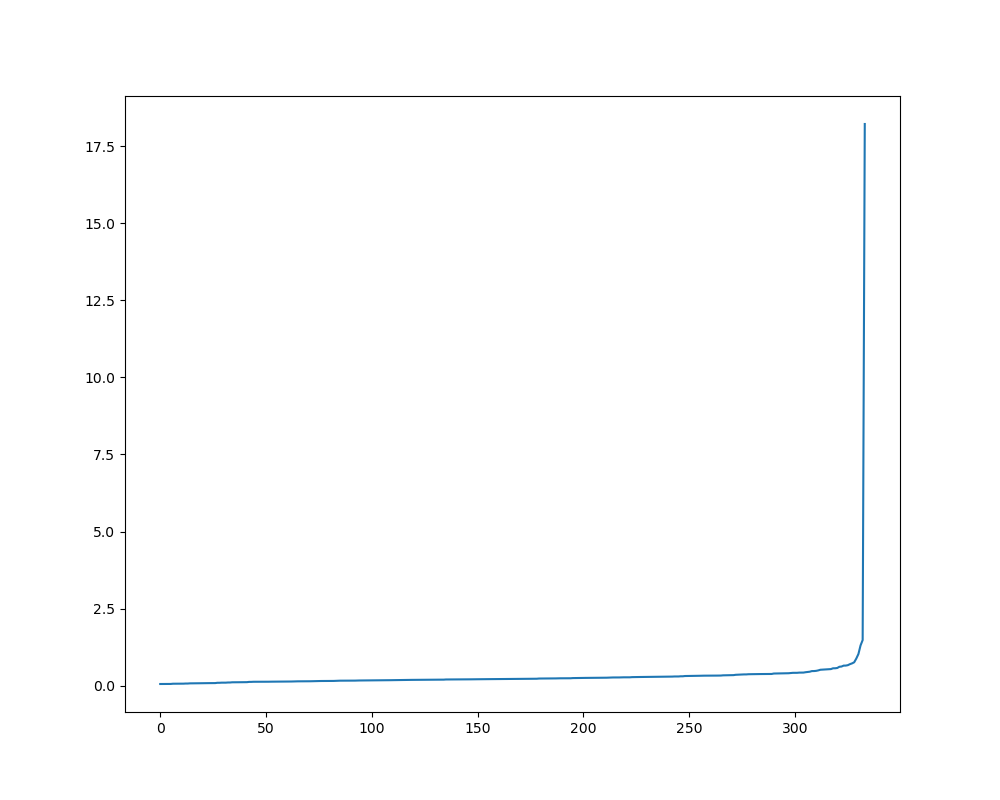

In [27]:
from sklearn.neighbors import NearestNeighbors
%matplotlib widget

nn = NearestNeighbors(n_neighbors=9).fit(X)
distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [28]:
dbscan076 = DBSCAN(eps=0.76, min_samples=10)
clusters = dbscan076.fit_predict(X)

labels076 = dbscan076.labels_

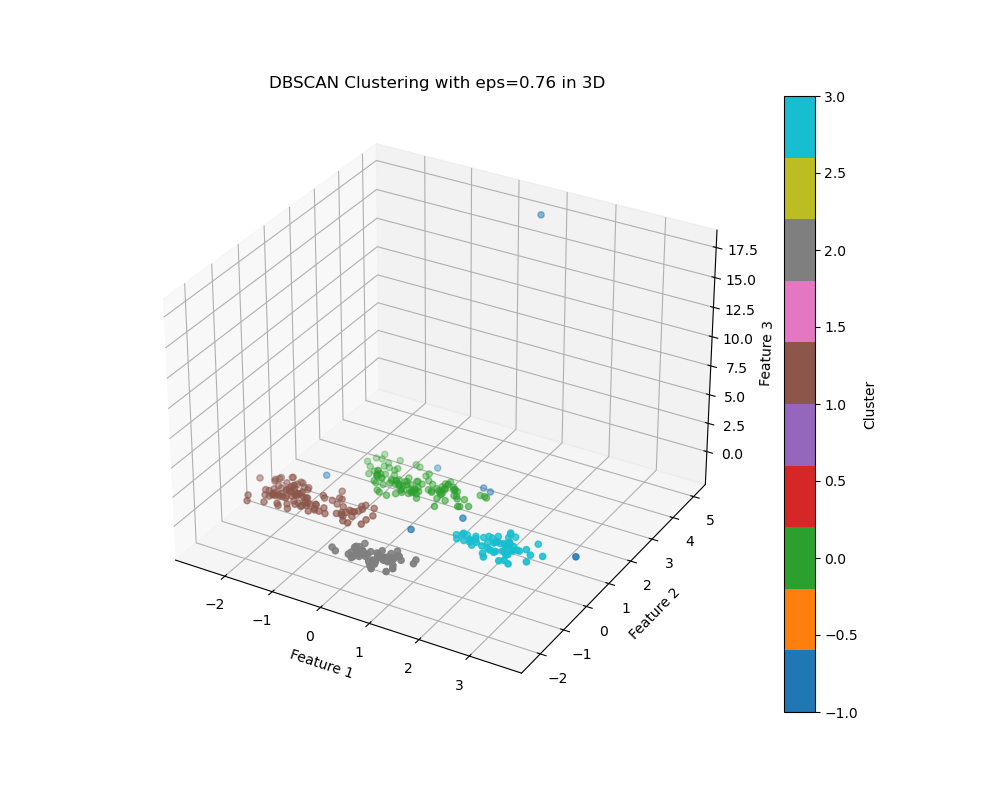

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels076, cmap='tab10')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering with eps=0.76 in 3D')
plt.colorbar(p, label='Cluster')

plt.show()

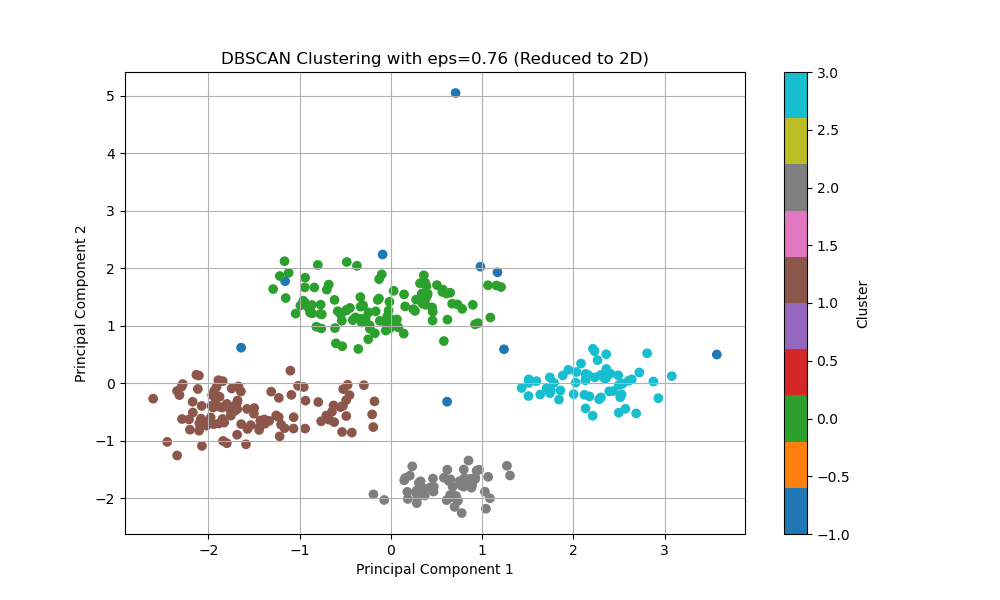

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels076, cmap='tab10')
labels1 = [x for x in labels076 if x != -1]
plt.title('DBSCAN Clustering with eps=0.76 (Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()